In [8]:
import math

def calculate_delta(i, n, m, l0, epsilon, previous_deltas):
    s = 1 - l0 - sum(previous_deltas)
    
    a = epsilon
    b = -(1 + epsilon * s + n + m - i)
    c = s

    discriminant = b**2 - 4 * a * c
    max_delta_i = (-b - math.sqrt(discriminant)) / (2 * a)

    if max_delta_i > 1 / epsilon:
        max_delta_i = 1 / epsilon
        
    return max_delta_i

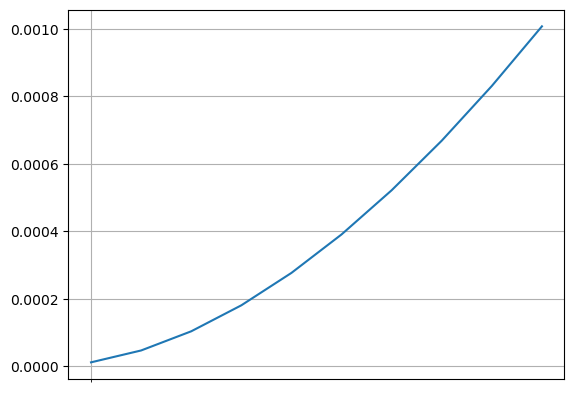

In [9]:
import matplotlib.pyplot as plt
import numpy as np

n = 1000
m = 20

l = []
l_2 = []

for k in range (m, m+10):
    l0 = (m - ((k + 1)*m*(m + n) / (-k + 2*m + n -1))**0.5) / (2 * m + n)
    l0_2 = - ((m * (k + 1))**0.5 - m) / n
    eps = m / -l0
    eps_2 = m / -l0_2
    deltas = []
    deltas_2 = []

    for i in range(k + 1):
        deltas.append(calculate_delta(i + 1, n, m=m,l0=l0, epsilon=eps, previous_deltas=deltas))
        deltas_2.append(calculate_delta(i + 1, n, m=m,l0=l0_2, epsilon=eps_2, previous_deltas=deltas_2))
        
    l.append(l0 + sum(deltas))
    l_2.append(l0_2 + sum(deltas_2))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

major_ticks = np.arange(0, k + 1, 100)
minor_ticks = np.arange(0, k + 1, 20)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='both')

plt.plot(range(m, m+10), np.array(l_2))
plt.show()
